In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(None)

In [2]:
class Perceptron:
    def __init__(self, alpha, hid_layer):
        self.alpha = alpha
        self.act_f = np.vectorize(lambda s: 1.0/(1+np.math.exp(-2.0*alpha*s)))
        #.act_f = np.vectorize(lambda s: np.math.tanh(s))
        
        self.w_hid = np.random.rand(hid_layer)
        self.w_bias = np.ones(hid_layer)
        self.w_last = np.random.rand(hid_layer)
    
    def fit(self, test_inputs, test_outputs, divisor, epoches, step, inert, learn_rate, reg):
        self.epoches = epoches
        self.err = np.empty(shape=(epoches,))
        
        dataset_len = len(test_inputs)
        
        for epoch in xrange(self.epoches):
            err = 0.0
            for batch_i in xrange(divisor):
                self.delta_w_last = 0
                self.delta_w_hid  = 0
                self.delta_w_bias = 0
                
                start_i = batch_i*dataset_len/divisor
                end_i = (batch_i+1)*dataset_len/divisor 
                inp_batch = test_inputs[start_i : end_i]
                outp_batch = test_outputs[start_i : end_i]
                
                for t_inp, t_outp in zip(inp_batch, outp_batch):
                    outp = self.predict(t_inp)
                    err += np.linalg.norm(outp - t_outp)

                    delta_last = -outp*(1 - outp)*(t_outp - outp)
                    delta_hid  = self.outps_hid*(1 - self.outps_hid)*delta_last*self.w_last

                    self.delta_w_last += inert*self.delta_w_last + (1 - inert)*step*delta_last*self.outps_hid
                    self.delta_w_hid  += inert*self.delta_w_hid + (1 - inert)*step*delta_hid*t_inp
                    self.delta_w_bias += inert*self.delta_w_bias + (1 - inert)*step*delta_hid
                    
                self.w_last += learn_rate*self.delta_w_last - reg*np.sum(np.abs(self.delta_w_last))
                self.w_hid  += learn_rate*self.delta_w_hid - reg*np.sum(np.abs(self.delta_w_hid))
                self.w_bias += learn_rate*self.delta_w_bias  - reg*np.sum(np.abs(self.w_bias))
            self.err[epoch] = err
        print "Epoch {}, Error = {}".format(epoch, err)
    
    def predict(self, x):
        self.outps_hid = self.act_f(x*self.w_hid + self.w_bias)
        return (np.sum(self.outps_hid * self.w_last))

In [3]:
a, b, n = -5, 5, 20

mu = 0
sigma = 1

f = np.vectorize(lambda x: x**2)
rands = np.random.normal(mu, sigma, size=n)

Epoch 2999, Error = 22.6026884758


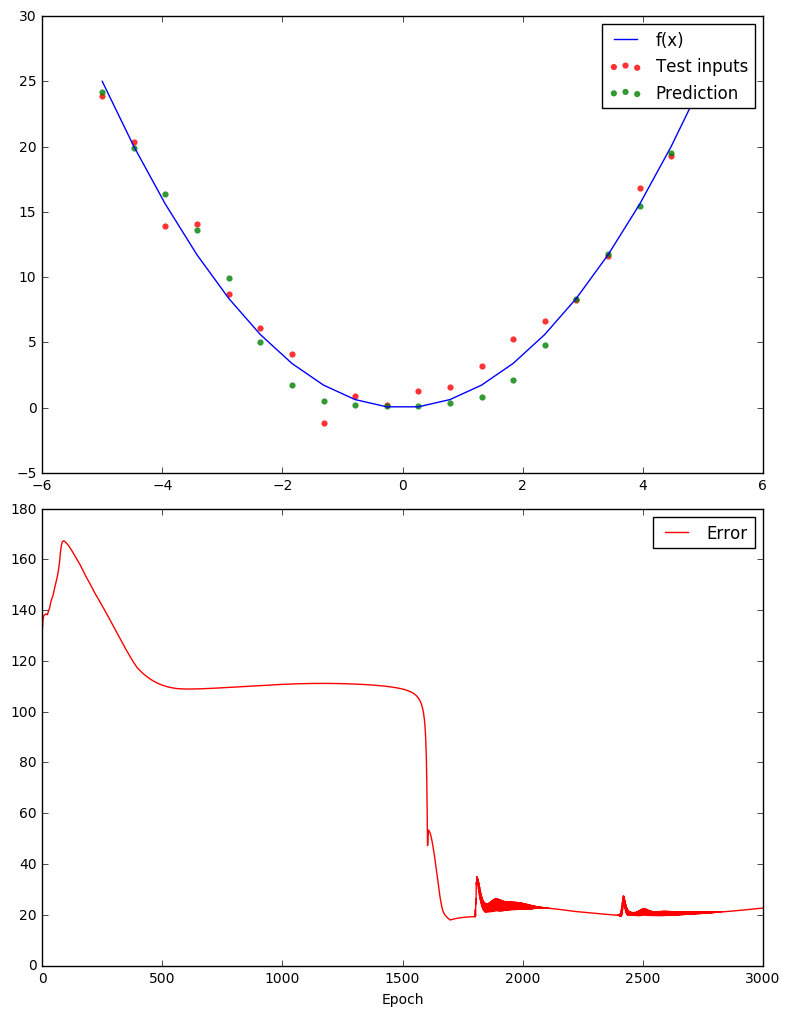

In [4]:
test_inp  = np.linspace(a, b, n)
test_outp = f(test_inp) + rands

nn = Perceptron(0.05, 20)

rand_ind = np.random.permutation(len(test_inp))

nn.fit(test_inp[rand_ind], test_outp[rand_ind], 3, 3000, 1e-5, 0.5, 4, 1e-5)
predictions = np.array([nn.predict(x) for x in test_inp])

plt.figure(figsize=(8,10), dpi=10)

plt.subplot(211)
plt.plot(test_inp, f(test_inp), c='b', label='f(x)')
plt.scatter(test_inp, test_outp, c='r', alpha=0.8, linewidths=0, label='Test inputs')
plt.scatter(test_inp, predictions, c='g', alpha=0.8, linewidths=0, label='Prediction')
plt.legend()

plt.subplot(212)
plt.plot(xrange(nn.epoches), nn.err, c='r', label="Error")
plt.tight_layout()
plt.xlabel("Epoch")
plt.legend()
plt.show()